 Apprentice Chef Assignment

In [622]:
# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
import statsmodels.formula.api as smf # predictive modeling with nice output
from sklearn.model_selection import train_test_split # train/test split
import sklearn.linear_model # linear modeling in scikit-learn
from sklearn.tree     import DecisionTreeRegressor     # regression trees
from sklearn.ensemble import RandomForestRegressor     # random forest
from sklearn.ensemble import GradientBoostingRegressor # gbm



# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = './Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
apprentice_chef = pd.read_excel(io = file,
                       header = 0)


# outputting the first ten rows of the dataset
apprentice_chef.head(5)


,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205


Exploratory Data Analysis

In [623]:
# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {apprentice_chef.shape[0]}
Features:     {apprentice_chef.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1946
Features:     28



In [624]:
# looping to print column names one by one
for data in apprentice_chef:
    print(data) 

REVENUE
CROSS_SELL_SUCCESS
NAME
EMAIL
FIRST_NAME
FAMILY_NAME
TOTAL_MEALS_ORDERED
UNIQUE_MEALS_PURCH
CONTACTS_W_CUSTOMER_SERVICE
PRODUCT_CATEGORIES_VIEWED
AVG_TIME_PER_SITE_VISIT
MOBILE_NUMBER
CANCELLATIONS_BEFORE_NOON
CANCELLATIONS_AFTER_NOON
TASTES_AND_PREFERENCES
PC_LOGINS
MOBILE_LOGINS
WEEKLY_PLAN
EARLY_DELIVERIES
LATE_DELIVERIES
PACKAGE_LOCKER
REFRIGERATED_LOCKER
AVG_PREP_VID_TIME
LARGEST_ORDER_SIZE
MASTER_CLASSES_ATTENDED
MEDIAN_MEAL_RATING
AVG_CLICKS_PER_VISIT
TOTAL_PHOTOS_VIEWED


In [625]:
# getting information about each variable
apprentice_chef.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   CROSS_SELL_SUCCESS           1946 non-null   int64  
 2   NAME                         1946 non-null   object 
 3   EMAIL                        1946 non-null   object 
 4   FIRST_NAME                   1946 non-null   object 
 5   FAMILY_NAME                  1899 non-null   object 
 6   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 11  MOBILE_NUMBER                1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON    1946 non-null   int64  
 13  CANCELLATIONS_AFTE

Only family name has missing values

In [626]:
#Renaming column header 'Largest_order_size' which was mislabelled
apprentice_chef.rename(columns = {'LARGEST_ORDER_SIZE': 'AVG_MEALS_ORD_PER_CUSTOMER'}, inplace = True)
apprentice_chef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   CROSS_SELL_SUCCESS           1946 non-null   int64  
 2   NAME                         1946 non-null   object 
 3   EMAIL                        1946 non-null   object 
 4   FIRST_NAME                   1946 non-null   object 
 5   FAMILY_NAME                  1899 non-null   object 
 6   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 11  MOBILE_NUMBER                1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON    1946 non-null   int64  
 13  CANCELLATIONS_AFTE

Identifying the data types in apprentice_chef dataset 


Develop a histogram to analyze the distribution of the Y-variable.


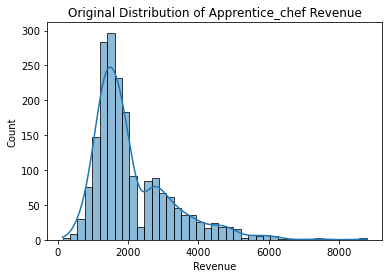

In [627]:
# developing a histogram for y-variable using HISTPLOT
sns.histplot(data  = apprentice_chef,
         x     = 'REVENUE',
        kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Apprentice_chef Revenue")
plt.xlabel(xlabel = "Revenue") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")


# displaying the histogram
plt.show()

As seen above Revenue is positively skewed and there is need to log transform 


In [628]:
# log transforming Sale_Price and saving it to the dataset
apprentice_chef['LOG_REVENUE'] = np.log(apprentice_chef['REVENUE'])


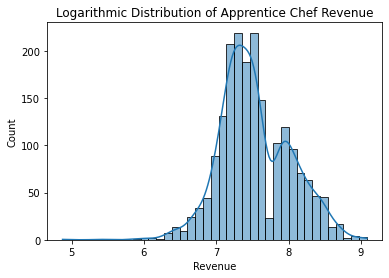

In [629]:
# developing a histogram using HISTPLOT
sns.histplot(data = apprentice_chef,
          x       = 'LOG_REVENUE',
          kde     = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Apprentice Chef Revenue")
plt.xlabel(xlabel = "Revenue") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [630]:
# descriptive statistics 
apprentice_chef.describe(include = 'number').round(decimals = 2)

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,AVG_MEALS_ORD_PER_CUSTOMER,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,LOG_REVENUE
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,0.71,5.52,1.48,11.33,1.49,2.97,0.36,0.11,150.56,4.44,0.60,2.79,13.51,106.43,7.53
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,0.45,0.58,0.53,13.57,2.32,2.74,0.48,0.32,49.45,1.55,0.64,0.76,2.33,181.01,0.49
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,1.00,0.00,1.00,5.00,0.00,4.88
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,114.40,3.00,0.00,2.00,12.00,0.00,7.21
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,145.60,4.00,1.00,3.00,13.00,0.00,7.46
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,1.00,6.00,2.00,13.00,3.00,4.00,1.00,0.00,173.78,5.00,1.00,3.00,15.00,174.00,7.89
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,564.20,11.00,3.00,5.00,19.00,1600.00,9.08


Some other independent features appear skewed from descriptive statistics. An histogram will show more about the distribution

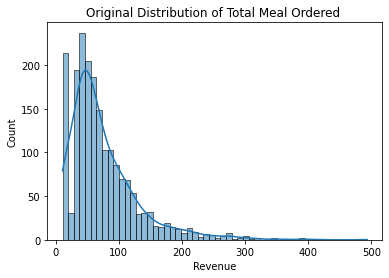

In [631]:
# developing a histogram using HISTPLOT 
sns.histplot(data = apprentice_chef,
          x       = 'TOTAL_MEALS_ORDERED',
          kde     = True)


# title and axis labels
plt.title(label   = "Original Distribution of Total Meal Ordered ")
plt.xlabel(xlabel = "Revenue") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

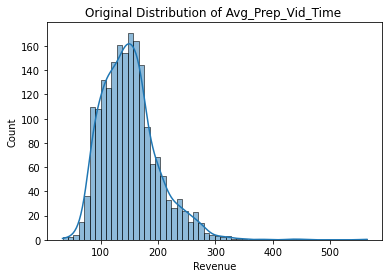

In [632]:
# developing a histogram using HISTPLOT 
sns.histplot(data = apprentice_chef,
          x       = 'AVG_PREP_VID_TIME',
          kde     = True)


# title and axis labels
plt.title(label   = "Original Distribution of Avg_Prep_Vid_Time ")
plt.xlabel(xlabel = "Revenue") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

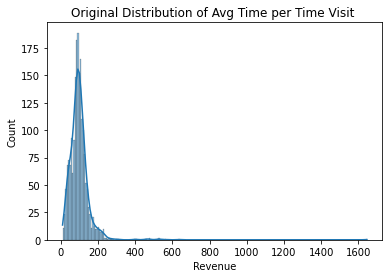

In [633]:
# developing a histogram using HISTPLOT 
sns.histplot(data = apprentice_chef,
          x       = 'AVG_TIME_PER_SITE_VISIT',
          kde     = True)


# title and axis labels
plt.title(label   = "Original Distribution of Avg Time per Time Visit ")
plt.xlabel(xlabel = "Revenue") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [634]:
# log transforming skewed explanatory features
apprentice_chef["LOG_AVG_PREP_VID_TIME"] = np.log(apprentice_chef["AVG_PREP_VID_TIME"])
apprentice_chef["LOG_AVG_TIME_PER_SITE_VISIT"] = np.log(apprentice_chef["AVG_TIME_PER_SITE_VISIT"])
apprentice_chef["LOG_TOTAL_MEALS_ORDERED"] = np.log(apprentice_chef["TOTAL_MEALS_ORDERED"])


Base Model using statsmodel

In [636]:
# creating a list of continuous features (including Revenue)
apprentice_base = ['REVENUE', 'AVG_TIME_PER_SITE_VISIT', 'AVG_PREP_VID_TIME']



# developing a correlation matrix based on continuous features
apprentice_corr = apprentice_chef[apprentice_base].corr(method = 'pearson')


# filtering the results to only show correlations with Sale_Price
apprentice_corr.loc[ : , "REVENUE"].round(decimals = 2).sort_values(ascending = False)

REVENUE                    1.00
AVG_PREP_VID_TIME          0.64
AVG_TIME_PER_SITE_VISIT    0.14
Name: REVENUE, dtype: float64

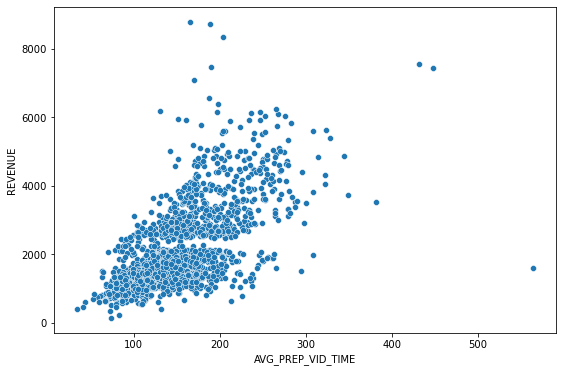

In [637]:
# scatter plot with the feature with the higher positive correlation
# setting figure size
fig, ax = plt.subplots(figsize = (9, 6))


# developing a scatterplot
sns.scatterplot(x    = "AVG_PREP_VID_TIME",
                y    = "REVENUE",
                data = housing)


# SHOWing the results
plt.show(block = True)

Building a base model

In [638]:
# Step 1: INSTANTIATE a model object- 
lm_best = smf.ols(formula = """REVENUE ~ AVG_PREP_VID_TIME + AVG_TIME_PER_SITE_VISIT""",
                  data = housing)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     690.9
Date:                Sun, 18 Sep 2022   Prob (F-statistic):          2.24e-227
Time:                        01:24:19   Log-Likelihood:                -15933.
No. Observations:                1946   AIC:                         3.187e+04
Df Residuals:                    1943   BIC:                         3.189e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

R-squared is 41.6%. We need to include other numerical variables in our model.

In [639]:
#creating a list of numerical variables
apprentice_all = ['REVENUE', 'AVG_TIME_PER_SITE_VISIT', 'AVG_PREP_VID_TIME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 
                  'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'CANCELLATIONS_BEFORE_NOON',
                  'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN',
                  'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_MEALS_ORD_PER_CUSTOMER',
                  'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 
                  'CROSS_SELL_SUCCESS']

# developing a correlation matrix based all numeric features
apprenticeall_corr = apprentice_chef[apprentice_all].corr(method = 'pearson')


# filtering the results to only show correlations with Revenue
apprenticeall_corr.loc[ : , 'REVENUE'].round(decimals = 2).sort_values(ascending = False)

REVENUE                        1.00
AVG_PREP_VID_TIME              0.64
MEDIAN_MEAL_RATING             0.61
TOTAL_MEALS_ORDERED            0.60
TOTAL_PHOTOS_VIEWED            0.47
MASTER_CLASSES_ATTENDED        0.45
AVG_MEALS_ORD_PER_CUSTOMER     0.44
AVG_TIME_PER_SITE_VISIT        0.14
CONTACTS_W_CUSTOMER_SERVICE    0.10
PRODUCT_CATEGORIES_VIEWED      0.03
PC_LOGINS                      0.02
CANCELLATIONS_BEFORE_NOON      0.01
TASTES_AND_PREFERENCES         0.01
WEEKLY_PLAN                    0.01
REFRIGERATED_LOCKER           -0.00
CROSS_SELL_SUCCESS             0.00
EARLY_DELIVERIES              -0.00
PACKAGE_LOCKER                -0.01
LATE_DELIVERIES               -0.01
MOBILE_LOGINS                 -0.02
CANCELLATIONS_AFTER_NOON      -0.04
UNIQUE_MEALS_PURCH            -0.06
AVG_CLICKS_PER_VISIT          -0.55
Name: REVENUE, dtype: float64

Only variables with positive correlation will be used in the regression model

In [640]:
# Step 1: INSTANTIATE a model object- statsmodel
lm_best = smf.ols(formula = """REVENUE ~  AVG_TIME_PER_SITE_VISIT + AVG_PREP_VID_TIME + TOTAL_MEALS_ORDERED + 
                  CONTACTS_W_CUSTOMER_SERVICE + PRODUCT_CATEGORIES_VIEWED + CANCELLATIONS_BEFORE_NOON + 
                  TASTES_AND_PREFERENCES + PC_LOGINS +  WEEKLY_PLAN + AVG_MEALS_ORD_PER_CUSTOMER + 
                  MASTER_CLASSES_ATTENDED + MEDIAN_MEAL_RATING + TOTAL_PHOTOS_VIEWED + CROSS_SELL_SUCCESS""",  
                  data = apprentice_chef)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     225.2
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        01:24:38   Log-Likelihood:                -15514.
No. Observations:                1946   AIC:                         3.106e+04
Df Residuals:                    1931   BIC:                         3.114e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

We eliminate variables with p-values > 0.05 and also adjust for collinear variable.

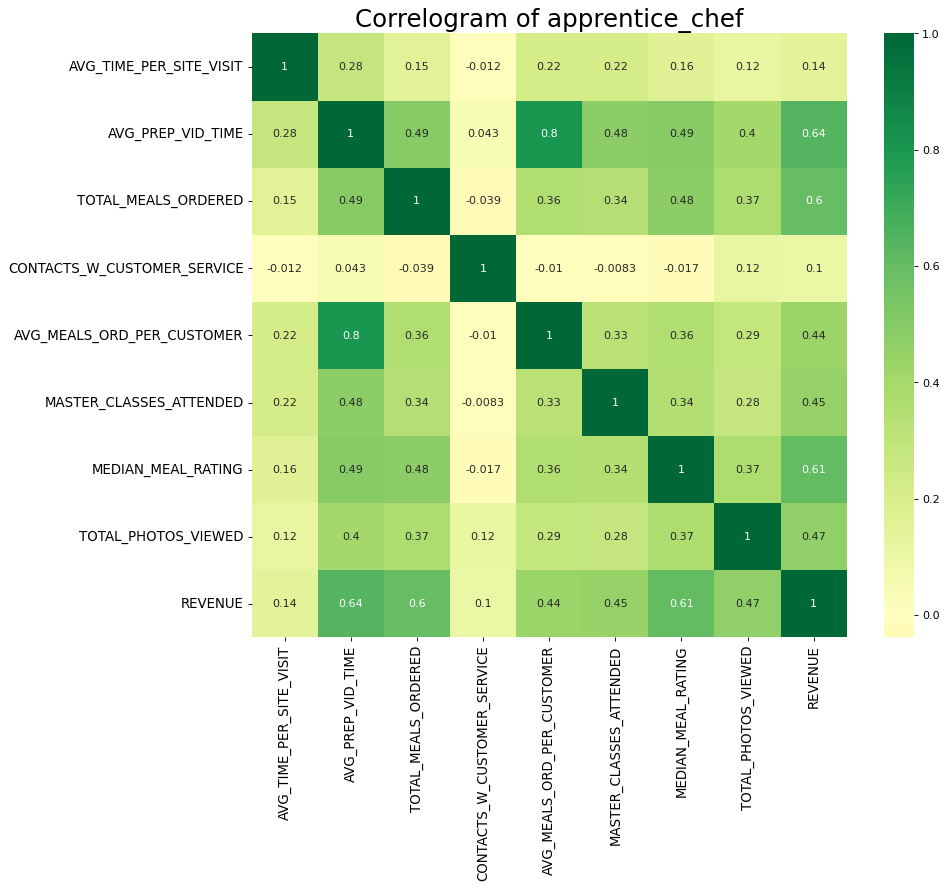

In [641]:
#running correlation with significant independent variables
my_data = apprentice_chef[["AVG_TIME_PER_SITE_VISIT", "AVG_PREP_VID_TIME", "TOTAL_MEALS_ORDERED", "CONTACTS_W_CUSTOMER_SERVICE", 
                "AVG_MEALS_ORD_PER_CUSTOMER", "MASTER_CLASSES_ATTENDED", "MEDIAN_MEAL_RATING", "TOTAL_PHOTOS_VIEWED", "REVENUE"]]
my_data.corr().round(2)

# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(my_data.corr(), xticklabels=my_data.corr().columns, yticklabels=my_data.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of apprentice_chef', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


AVG_MEALS_ORD_PER_CUSTOMER as a strong positive correlation to AVG_PREP_VID_TIME and as such one of these variables 
will be excluded from our model

In [642]:
# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """REVENUE ~  AVG_TIME_PER_SITE_VISIT + AVG_PREP_VID_TIME + TOTAL_MEALS_ORDERED + 
                  CONTACTS_W_CUSTOMER_SERVICE + MASTER_CLASSES_ATTENDED + MEDIAN_MEAL_RATING + TOTAL_PHOTOS_VIEWED""",  
                  data = apprentice_chef)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     437.7
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        01:25:04   Log-Likelihood:                -15533.
No. Observations:                1946   AIC:                         3.108e+04
Df Residuals:                    1938   BIC:                         3.113e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

Introducing log transformed variables

In [643]:
# building a base model with a log transformed response variable
lm_best = smf.ols(formula = """LOG_REVENUE ~  LOG_AVG_TIME_PER_SITE_VISIT + LOG_AVG_PREP_VID_TIME + LOG_TOTAL_MEALS_ORDERED + 
                  CONTACTS_W_CUSTOMER_SERVICE + MASTER_CLASSES_ATTENDED + MEDIAN_MEAL_RATING + TOTAL_PHOTOS_VIEWED""",  
                  data = apprentice_chef)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            LOG_REVENUE   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     595.7
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        01:25:13   Log-Likelihood:                -246.49
No. Observations:                1946   AIC:                             509.0
Df Residuals:                    1938   BIC:                             553.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

Feature Engineering

Text(0, 0.5, 'REVENUE')

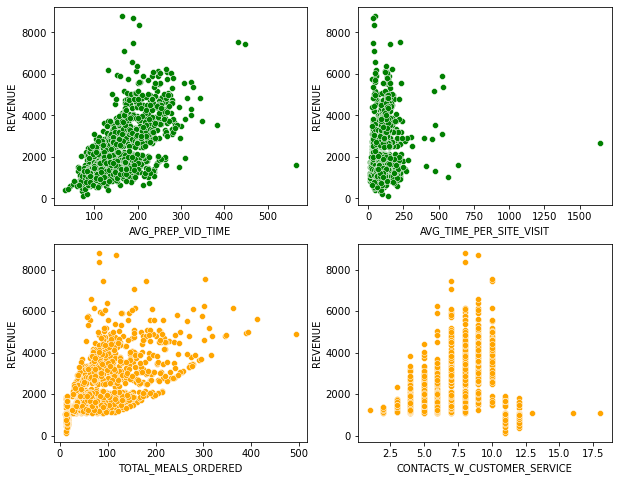

In [644]:
########################
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = apprentice_chef['AVG_PREP_VID_TIME'],
                y = apprentice_chef['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'AVG_PREP_VID_TIME')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = apprentice_chef['AVG_TIME_PER_SITE_VISIT'],
                y = apprentice_chef['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'AVG_TIME_PER_SITE_VISIT')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = apprentice_chef['TOTAL_MEALS_ORDERED'],
                y = apprentice_chef['REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'TOTAL_MEALS_ORDERED')
plt.ylabel(ylabel = 'REVENUE')


########################

# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = apprentice_chef['CONTACTS_W_CUSTOMER_SERVICE'],
                y = apprentice_chef['REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'CONTACTS_W_CUSTOMER_SERVICE')
plt.ylabel(ylabel = 'REVENUE')



Text(0, 0.5, 'REVENUE')

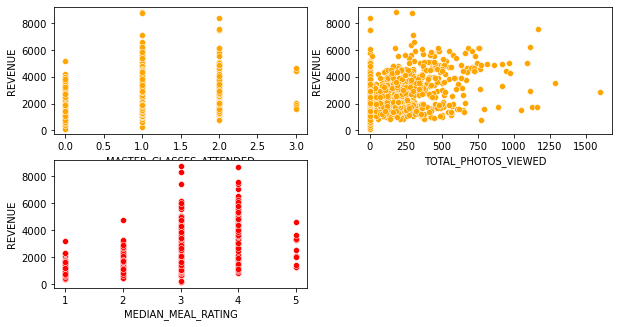

In [645]:
########################
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))
########################

# developing a scatterplot
plt.subplot(3, 2, 1)
sns.scatterplot(x = apprentice_chef['MASTER_CLASSES_ATTENDED'],
                y = apprentice_chef['REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'MASTER_CLASSES_ATTENDED')
plt.ylabel(ylabel = 'REVENUE')

########################

# developing a scatterplot
plt.subplot(3, 2, 2)
sns.scatterplot(x = apprentice_chef['TOTAL_PHOTOS_VIEWED'],
                y = apprentice_chef['REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'TOTAL_PHOTOS_VIEWED')
plt.ylabel(ylabel = 'REVENUE')


########################

# developing a scatterplot
plt.subplot(3, 2, 3)
sns.scatterplot(x = apprentice_chef['MEDIAN_MEAL_RATING'],
                y = apprentice_chef['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'MEDIAN_MEAL_RATING')
plt.ylabel(ylabel = 'REVENUE')



In [646]:
print(sum(apprentice_chef['TOTAL_PHOTOS_VIEWED']==0))
print(sum(apprentice_chef['MASTER_CLASSES_ATTENDED']==0))
print(sum(apprentice_chef['TASTES_AND_PREFERENCES']==0))

1140
932
556


In [648]:
# counting the number of zeroes for photos viewed, master class attended and taste & preferences
photos_zeroes   = len(apprentice_chef['TOTAL_PHOTOS_VIEWED'][housing['TOTAL_PHOTOS_VIEWED']==0]) # Total_Photos_viewed
mclasses_zeroes   = len(apprentice_chef['MASTER_CLASSES_ATTENDED'][housing['MASTER_CLASSES_ATTENDED']==0]) # Total_Photos_viewed
tastes_zeroes   = len(apprentice_chef['TASTES_AND_PREFERENCES'][housing['TASTES_AND_PREFERENCES']==0]) # Total_Photos_viewed


# printing a table of the results
print(f"""
                       No\t\tYes
                     ---------------------
Photos viewed       | {photos_zeroes}\t\t{len(apprentice_chef) - photos_zeroes}
Master Class        | {mclasses_zeroes}\t\t{len(apprentice_chef) - mclasses_zeroes}
Taste Pref.         | {tastes_zeroes}\t\t{len(apprentice_chef) - tastes_zeroes}
""")


                       No		Yes
                     ---------------------
Photos viewed       | 1140		806
Master Class        | 932		1014
Taste Pref.         | 556		1390



We can engineer flag features for all variables above since at least 100 observations are in the 'yes' and 'no' columns

In [649]:
# placeholder variables
apprentice_chef['VIEWED_PHOTOS'] = 0
apprentice_chef['ATTEND_MASTERCLASS'] = 0
apprentice_chef['HAS_TASTE_PREF'] = 0


for index, value in apprentice_chef.iterrows():
    
    # TOTAL_PHOTOS_VIEWED
    if apprentice_chef.loc[index, "TOTAL_PHOTOS_VIEWED"] > 0:
        apprentice_chef.loc[index, 'VIEWED_PHOTOS'] = 1
        
        
    # ATTEND_MASTERCLASS
    if apprentice_chef.loc[index, "MASTER_CLASSES_ATTENDED"] > 0:
        apprentice_chef.loc[index, 'ATTEND_MASTERCLASS'] = 1
        
        
    # TASTE & PREFERENCE
    if apprentice_chef.loc[index, "TASTES_AND_PREFERENCES"] > 0:
        apprentice_chef.loc[index, 'HAS_TASTE_PREF'] = 1
        

In [650]:
# checking results
apprentice_chef[  ['VIEWED_PHOTOS', 'ATTEND_MASTERCLASS', 'HAS_TASTE_PREF']  ].head(n = 5)

,VIEWED_PHOTOS,ATTEND_MASTERCLASS,HAS_TASTE_PREF
0,0,0,1
1,1,0,1
2,0,0,1
3,0,0,1
4,1,1,0


In [651]:
# developing a small correlation matrix
zeroes_corr = apprentice_chef.corr()    # .round(decimals = 2)


# checking the correlations of the newly-created variables with Sale_Price
zeroes_corr.loc['REVENUE',                   # Y-variable
               ['VIEWED_PHOTOS', 'ATTEND_MASTERCLASS',    # X-variables
                'HAS_TASTE_PREF']] \
                .sort_values(ascending = False)

ATTEND_MASTERCLASS    0.453022
VIEWED_PHOTOS         0.372072
HAS_TASTE_PREF        0.007847
Name: REVENUE, dtype: float64

Features Engineering with Interval and Count Data

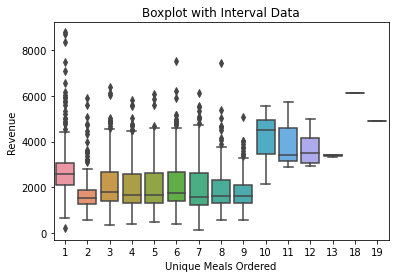

In [652]:
# developing a scatterplot
sns.boxplot(x    = 'UNIQUE_MEALS_PURCH',
                y    = 'REVENUE',
                data = apprentice_chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Unique Meals Ordered')
plt.ylabel(ylabel = 'Revenue')


# displaying the plot
plt.show()

No significant relationship to Revenue until the 10th unique order is made.

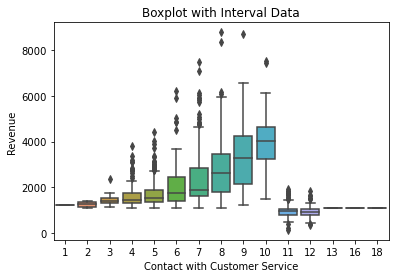

In [653]:
# developing a scatterplot
sns.boxplot(x    = 'CONTACTS_W_CUSTOMER_SERVICE',
                y    = 'REVENUE',
                data = apprentice_chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Contact with Customer Service')
plt.ylabel(ylabel = 'Revenue')


# displaying the plot
plt.show()

Majority of contact with customer service is complaint related. The above shows that after 10 contacts, the Revenue drops 
remarkably.

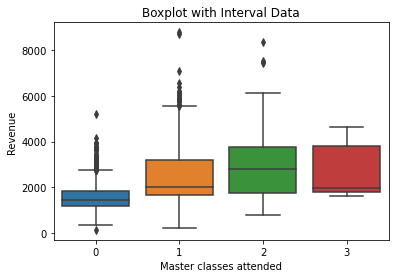

In [654]:
# developing a scatterplot
sns.boxplot(x    = 'MASTER_CLASSES_ATTENDED',
                y    = 'REVENUE',
                data = apprentice_chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Master classes attended')
plt.ylabel(ylabel = 'Revenue')


# displaying the plot
plt.show()


Also, the effect of master class attendance on Revenue drops after 2 classes.

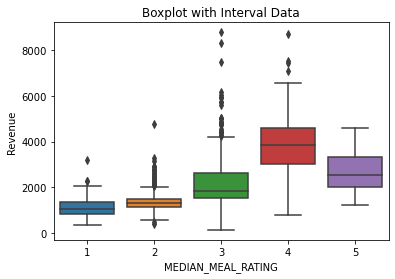

In [655]:
# developing a scatterplot
sns.boxplot(x    = 'MEDIAN_MEAL_RATING',
                y    = 'REVENUE',
                data = apprentice_chef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'MEDIAN_MEAL_RATING')
plt.ylabel(ylabel = 'Revenue')


# displaying the plot
plt.show()


In [656]:
# creating new independent variable - avg meal rating per meal order
apprentice_chef['AVG_MEAL_RATING_PER_MEAL_ORDER'] = apprentice_chef['MEDIAN_MEAL_RATING']/apprentice_chef['TOTAL_MEALS_ORDERED']

In [657]:
# creating a (Pearson) correlation matrix
apprenticec_corr = apprentice_chef.corr().round(2)


# printing (Pearson) correlations with SalePrice
print(apprenticec_corr.loc['REVENUE'].sort_values(ascending = False))

REVENUE                           1.00
LOG_REVENUE                       0.95
AVG_PREP_VID_TIME                 0.64
LOG_AVG_PREP_VID_TIME             0.63
MEDIAN_MEAL_RATING                0.61
LOG_TOTAL_MEALS_ORDERED           0.61
TOTAL_MEALS_ORDERED               0.60
TOTAL_PHOTOS_VIEWED               0.47
MASTER_CLASSES_ATTENDED           0.45
ATTEND_MASTERCLASS                0.45
AVG_MEALS_ORD_PER_CUSTOMER        0.44
VIEWED_PHOTOS                     0.37
LOG_AVG_TIME_PER_SITE_VISIT       0.15
AVG_TIME_PER_SITE_VISIT           0.14
CONTACTS_W_CUSTOMER_SERVICE       0.10
MOBILE_NUMBER                     0.03
PRODUCT_CATEGORIES_VIEWED         0.03
PC_LOGINS                         0.02
HAS_TASTE_PREF                    0.01
TASTES_AND_PREFERENCES            0.01
CANCELLATIONS_BEFORE_NOON         0.01
WEEKLY_PLAN                       0.01
EARLY_DELIVERIES                 -0.00
CROSS_SELL_SUCCESS                0.00
REFRIGERATED_LOCKER              -0.00
PACKAGE_LOCKER           

In [658]:
# making a copy of apprentice
apprentice_chef_explanatory = apprentice_chef.copy()


# dropping Revenue, collinear variables and others from the explanatory variable set
apprentice_chef_explanatory = apprentice_chef_explanatory.drop(['REVENUE',
                                                                'LOG_REVENUE',
                                                                'LOG_AVG_PREP_VID_TIME', 
                                                                'LOG_AVG_TIME_PER_SITE_VISIT', 
                                                                'LOG_TOTAL_MEALS_ORDERED', 
                                                                'AVG_MEALS_ORD_PER_CUSTOMER',
                                                                'NAME',     
                                                                'EMAIL', 
                                                                'FIRST_NAME',  
                                                                'FAMILY_NAME'                              
                                                                 ], axis = 1)


# formatting each explanatory variable for statsmodels
for val in apprentice_chef_explanatory:
   print(f"{val} + ")

CROSS_SELL_SUCCESS + 
TOTAL_MEALS_ORDERED + 
UNIQUE_MEALS_PURCH + 
CONTACTS_W_CUSTOMER_SERVICE + 
PRODUCT_CATEGORIES_VIEWED + 
AVG_TIME_PER_SITE_VISIT + 
MOBILE_NUMBER + 
CANCELLATIONS_BEFORE_NOON + 
CANCELLATIONS_AFTER_NOON + 
TASTES_AND_PREFERENCES + 
PC_LOGINS + 
MOBILE_LOGINS + 
WEEKLY_PLAN + 
EARLY_DELIVERIES + 
LATE_DELIVERIES + 
PACKAGE_LOCKER + 
REFRIGERATED_LOCKER + 
AVG_PREP_VID_TIME + 
MASTER_CLASSES_ATTENDED + 
MEDIAN_MEAL_RATING + 
AVG_CLICKS_PER_VISIT + 
TOTAL_PHOTOS_VIEWED + 
VIEWED_PHOTOS + 
ATTEND_MASTERCLASS + 
HAS_TASTE_PREF + 
AVG_MEAL_RATING_PER_MEAL_ORDER + 


In [659]:
lm_full = smf.ols(formula = """ REVENUE ~  CROSS_SELL_SUCCESS + 
                                TOTAL_MEALS_ORDERED + 
                                UNIQUE_MEALS_PURCH + 
                                CONTACTS_W_CUSTOMER_SERVICE + 
                                PRODUCT_CATEGORIES_VIEWED + 
                                AVG_TIME_PER_SITE_VISIT + 
                                MOBILE_NUMBER + 
                                CANCELLATIONS_BEFORE_NOON + 
                                CANCELLATIONS_AFTER_NOON + 
                                TASTES_AND_PREFERENCES + 
                                PC_LOGINS + 
                                MOBILE_LOGINS + 
                                WEEKLY_PLAN + 
                                EARLY_DELIVERIES + 
                                LATE_DELIVERIES + 
                                PACKAGE_LOCKER + 
                                REFRIGERATED_LOCKER + 
                                AVG_PREP_VID_TIME + 
                                MASTER_CLASSES_ATTENDED + 
                                MEDIAN_MEAL_RATING + 
                                AVG_CLICKS_PER_VISIT + 
                                TOTAL_PHOTOS_VIEWED + 
                                VIEWED_PHOTOS + 
                                ATTEND_MASTERCLASS + 
                                HAS_TASTE_PREF + 
                                AVG_MEAL_RATING_PER_MEAL_ORDER""", 
                               data = apprentice_chef)


# Step 2: FIT the data into the model object
results = lm_full.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     147.2
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        01:28:37   Log-Likelihood:                -15414.
No. Observations:                1946   AIC:                         3.088e+04
Df Residuals:                    1920   BIC:                         3.102e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

Goals:

High Adjusted R-square or 

All p-values in model < 0.05

In [661]:
lm_prune = smf.ols(formula = """REVENUE ~  CROSS_SELL_SUCCESS + 
                                TOTAL_MEALS_ORDERED + 
                                UNIQUE_MEALS_PURCH + 
                                CONTACTS_W_CUSTOMER_SERVICE + 
                                AVG_TIME_PER_SITE_VISIT + 
                                AVG_PREP_VID_TIME + 
                                MASTER_CLASSES_ATTENDED + 
                                MEDIAN_MEAL_RATING + 
                                TOTAL_PHOTOS_VIEWED + 
                                AVG_MEAL_RATING_PER_MEAL_ORDER""", 
                               data = apprentice_chef)


# Step 2: FIT the data into the model object
results = lm_prune.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     367.3
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        01:29:05   Log-Likelihood:                -15420.
No. Observations:                1946   AIC:                         3.086e+04
Df Residuals:                    1935   BIC:                         3.092e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [662]:
#Model using Log_Revenue and other logarithm transformed features

lm_final = smf.ols(formula = """LOG_REVENUE ~  CROSS_SELL_SUCCESS + 
                                LOG_AVG_PREP_VID_TIME + 
                                LOG_AVG_TIME_PER_SITE_VISIT + 
                                LOG_TOTAL_MEALS_ORDERED +
                                UNIQUE_MEALS_PURCH + 
                                CONTACTS_W_CUSTOMER_SERVICE + 
                                MASTER_CLASSES_ATTENDED + 
                                MEDIAN_MEAL_RATING + 
                                TOTAL_PHOTOS_VIEWED + 
                                AVG_MEAL_RATING_PER_MEAL_ORDER""", 
                               data = apprentice_chef)


# Step 2: FIT the data into the model object
results = lm_final.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            LOG_REVENUE   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     487.4
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        01:29:15   Log-Likelihood:                -139.15
No. Observations:                1946   AIC:                             300.3
Df Residuals:                    1935   BIC:                             361.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

R-squared is 71.6% and this is FINAL for our base model. 

A. Ordinary Least Squares Regression

In [663]:
# declaring set of x-variables - statsmodel variables
x_variables = ['CROSS_SELL_SUCCESS', 'LOG_AVG_PREP_VID_TIME', 'LOG_AVG_TIME_PER_SITE_VISIT', 'LOG_TOTAL_MEALS_ORDERED',
               'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 
               'TOTAL_PHOTOS_VIEWED', 'AVG_MEAL_RATING_PER_MEAL_ORDER']

# all x-variables
x_full = ['CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
          'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES',
          'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER',
          'AVG_PREP_VID_TIME', 'AVG_MEALS_ORD_PER_CUSTOMER', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED']

In [665]:
# applying modelin scikit-learn

# preparing x-variables from the OLS model
x_data = apprentice_chef.loc[ : , x_variables ]


# preparing response variable
y_data = apprentice_chef.loc[ : , "LOG_REVENUE" ]


###############################################
## setting up more than one train-test split ##
###############################################
x_train, x_test, y_train, y_test = train_test_split(
            x_data,         # x-variables 
            y_data,       # y-variable  
            test_size    = 0.25,
            random_state = 219)


In [666]:
# Setting a model name
model_name = "OLS Regression"


# INSTANTIATING a model object 
model = sklearn.linear_model.LinearRegression()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# dynamically printing results
OLS_Model =  f"""\
Model Name:     {model_name} 
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}

Final Model

"""

print(OLS_Model)

Model Name:     OLS Regression 
Train_Score:    0.7126
Test_Score:     0.7225
Train-Test Gap: 0.0099

Final Model




B. Lasso Regression

In [667]:
# Setting a model name
model_name = "Lasso"


# INSTANTIATING a model object 
model = sklearn.linear_model.Lasso()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# dynamically printing results
Lasso_Model =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}

Final Model

"""

print(Lasso_Model)

Model Name:     Lasso
Train_Score:    0.186
Test_Score:     0.1841
Train-Test Gap: 0.0019

Final Model




C. Bayesian Automatic Relevance Determination (ARD)

In [668]:
# Setting a model name
model_name = 'ARD Regression'


# INSTANTIATING a model object 
model = sklearn.linear_model.ARDRegression()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# dynamically printing results
ARD_Model =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}

Final Model

"""

print(ARD_Model)

Model Name:     ARD Regression
Train_Score:    0.7084
Test_Score:     0.7187
Train-Test Gap: 0.0103

Final Model




D. Regression Trees 

In [669]:
# loading user defined function for for CART output model

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [670]:
model_name = 'Regression Tree'

# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = DecisionTreeRegressor(max_depth        = 4,
                              min_samples_leaf = 40,
                              random_state     = 219)


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# dynamically printing results
Regression_Tree_Model =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}

Final Model

"""

print(Regression_Tree_Model)

Model Name:     Regression Tree
Train_Score:    0.698
Test_Score:     0.6639
Train-Test Gap: 0.0341

Final Model




E. Random Forest

In [671]:
# specifying a model name
model_name = 'Random Forest'


# INSTANTIATING a random forest model with pruned values
model = RandomForestRegressor( n_estimators     = 100,
                               criterion        = 'mse',
                               max_depth        = 4,
                               min_samples_leaf = 25,
                               bootstrap        = True,
                               warm_start       = False,
                               random_state     = 219)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# dynamically printing results
Random_Forest_Model =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}

Final Model

"""

print(Random_Forest_Model)

Model Name:     Random Forest
Train_Score:    0.767
Test_Score:     0.7595
Train-Test Gap: 0.0075

Final Model




F. Gradient Boosting Machines (GBM)

In [672]:
#INSTANTIATING the model object without hyperparameters
# specifying a model name
model_name = 'GBM'

#INSTANTIATING the model object without hyperparameters
model = GradientBoostingRegressor(loss          = 'ls',
                                  learning_rate = 0.1,
                                  n_estimators  = 100,
                                  criterion     = 'mae',
                                  max_depth     = 3,
                                  warm_start    = False,
                                  random_state  = 219)


 #FITTING the training data
model_fit = model.fit(x_train, y_train)


#PREDICTING based on the testing set
model_pred = model.predict(x_test)


#SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# dynamically printing results
GBM_Model =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}

Final Model

"""

print(GBM_Model)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1630: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "


Model Name:     GBM
Train_Score:    0.8737
Test_Score:     0.825
Train-Test Gap: 0.0487

Final Model




GBM produces the highest R-squared which better fits the data and returns a train/test gap below 0.05. 